<a href="https://colab.research.google.com/github/rka0285058-afk/Heart_Disease/blob/main/RKAWASTHI.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Heart_Disease/train.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
0,0,58,1,4,152,239,0,0,158,1,3.6,2,2,7,Presence
1,1,52,1,1,125,325,0,2,171,0,0.0,1,0,3,Absence
2,2,56,0,2,160,188,0,2,151,0,0.0,1,0,3,Absence
3,3,44,0,3,134,229,0,2,150,0,1.0,2,0,3,Absence
4,4,58,1,4,140,234,0,2,125,1,3.8,2,3,3,Presence


In [3]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Heart_Disease/test.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
display(df.head())

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
0,630000,58,1,3,120,288,0,2,145,1,0.8,2,3,3
1,630001,55,0,2,120,209,0,0,172,0,0.0,1,0,3
2,630002,54,1,4,120,268,0,0,150,1,0.0,2,3,7
3,630003,44,0,3,112,177,0,0,168,0,0.9,1,0,3
4,630004,43,1,1,138,267,0,0,163,0,1.8,2,0,7


In [4]:
import pandas as pd

# Replace 'path/to/your/file.csv' with the actual path to your CSV file in Google Drive
file_path = '/content/drive/MyDrive/Heart_Disease/sample_submission.csv'
df = pd.read_csv(file_path)

# Display the first 5 rows of the DataFrame
display(df.head())


,id,Heart Disease
0,630000,0
1,630001,0
2,630002,0
3,630003,0
4,630004,0


In [5]:
train_df = pd.read_csv('/content/drive/MyDrive/Heart_Disease/train.csv')
test_df = pd.read_csv('/content/drive/MyDrive/Heart_Disease/test.csv')
submission_df = df.copy()

print("Loaded train_df and test_df, and renamed df to submission_df.")

Loaded train_df and test_df, and renamed df to submission_df.


Data Preprocessing


Cleaned and preprocessed both the training and testing datasets. This includes converting the 'Heart Disease' target variable to numerical format (e.g., 0 for 'Absence', 1 for 'Presence'), handling any categorical features using techniques like one-hot encoding, and addressing potential missing values or scaling numerical features if necessary. Ensure consistency between training and testing data preprocessing steps.


In [6]:
print("Train DataFrame Info:")
train_df.info()
print("\nTrain DataFrame Description:")
display(train_df.describe(include='all'))

print("\nTest DataFrame Info:")
test_df.info()
print("\nTest DataFrame Description:")
display(test_df.describe(include='all'))

print("\nUnique values and counts for 'Heart Disease' in train_df:")
display(train_df['Heart Disease'].value_counts())


Train DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 630000 entries, 0 to 629999
Data columns (total 15 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       630000 non-null  int64  
 1   Age                      630000 non-null  int64  
 2   Sex                      630000 non-null  int64  
 3   Chest pain type          630000 non-null  int64  
 4   BP                       630000 non-null  int64  
 5   Cholesterol              630000 non-null  int64  
 6   FBS over 120             630000 non-null  int64  
 7   EKG results              630000 non-null  int64  
 8   Max HR                   630000 non-null  int64  
 9   Exercise angina          630000 non-null  int64  
 10  ST depression            630000 non-null  float64
 11  Slope of ST              630000 non-null  int64  
 12  Number of vessels fluro  630000 non-null  int64  
 13  Thallium                 630000 non-n

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium,Heart Disease
count,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000.000000,630000
unique,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,2
top,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Absence
freq,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,347546
mean,314999.500000,54.136706,0.714735,3.312752,130.497433,245.011814,0.079987,0.981660,152.816763,0.273725,0.716028,1.455871,0.451040,4.618873,NaN
std,181865.479132,8.256301,0.451541,0.851615,14.975802,33.681581,0.271274,0.998783,19.112927,0.445870,0.948472,0.545192,0.798549,1.950007,NaN
min,0.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN
25%,157499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.000000,3.000000,NaN
50%,314999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.000000,3.000000,NaN
75%,472499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.000000,7.000000,NaN



Test DataFrame Info:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 270000 entries, 0 to 269999
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   id                       270000 non-null  int64  
 1   Age                      270000 non-null  int64  
 2   Sex                      270000 non-null  int64  
 3   Chest pain type          270000 non-null  int64  
 4   BP                       270000 non-null  int64  
 5   Cholesterol              270000 non-null  int64  
 6   FBS over 120             270000 non-null  int64  
 7   EKG results              270000 non-null  int64  
 8   Max HR                   270000 non-null  int64  
 9   Exercise angina          270000 non-null  int64  
 10  ST depression            270000 non-null  float64
 11  Slope of ST              270000 non-null  int64  
 12  Number of vessels fluro  270000 non-null  int64  
 13  Thallium                 270000 non-n

,id,Age,Sex,Chest pain type,BP,Cholesterol,FBS over 120,EKG results,Max HR,Exercise angina,ST depression,Slope of ST,Number of vessels fluro,Thallium
count,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.000000,270000.00000,270000.000000
mean,764999.500000,54.159870,0.716315,3.315107,130.555089,245.045270,0.080052,0.978493,152.783756,0.274656,0.718082,1.459356,0.45480,4.619774
std,77942.430678,8.255471,0.450787,0.851762,15.007908,33.695458,0.271374,0.998686,19.153454,0.446341,0.947417,0.546186,0.80127,1.950273
min,630000.000000,29.000000,0.000000,1.000000,94.000000,126.000000,0.000000,0.000000,71.000000,0.000000,0.000000,1.000000,0.00000,3.000000
25%,697499.750000,48.000000,0.000000,3.000000,120.000000,223.000000,0.000000,0.000000,142.000000,0.000000,0.000000,1.000000,0.00000,3.000000
50%,764999.500000,54.000000,1.000000,4.000000,130.000000,243.000000,0.000000,0.000000,157.000000,0.000000,0.100000,1.000000,0.00000,3.000000
75%,832499.250000,60.000000,1.000000,4.000000,140.000000,269.000000,0.000000,2.000000,166.000000,1.000000,1.400000,2.000000,1.00000,7.000000
max,899999.000000,77.000000,1.000000,4.000000,200.000000,564.000000,1.000000,2.000000,202.000000,1.000000,6.200000,3.000000,3.00000,7.000000



Unique values and counts for 'Heart Disease' in train_df:


,count
Heart Disease,
Absence,347546
Presence,282454



The next step was to convert the 'Heart Disease' column in `train_df` from categorical strings ('Absence', 'Presence') to a numerical format (0, 1) as required by the subtask. This will make it suitable for machine learning models.



In [7]:
train_df['Heart Disease'] = train_df['Heart Disease'].map({'Absence': 0, 'Presence': 1})
print("Converted 'Heart Disease' column to numerical format (0 for Absence, 1 for Presence).")
print("Value counts for 'Heart Disease' after conversion:")
display(train_df['Heart Disease'].value_counts())


Converted 'Heart Disease' column to numerical format (0 for Absence, 1 for Presence).
Value counts for 'Heart Disease' after conversion:


,count
Heart Disease,
0,347546
1,282454


In [8]:
categorical_cols = [
    'Sex',
    'Chest pain type',
    'FBS over 120',
    'EKG results',
    'Exercise angina',
    'Slope of ST',
    'Number of vessels fluro',
    'Thallium'
]

# Apply one-hot encoding to categorical columns in train_df
train_df_encoded = pd.get_dummies(train_df, columns=categorical_cols, drop_first=False)

# Apply one-hot encoding to categorical columns in test_df
test_df_encoded = pd.get_dummies(test_df, columns=categorical_cols, drop_first=False)

# Align columns - this is crucial to ensure both dataframes have the same columns in the same order
# We exclude 'id' from alignment because it's not a feature, and 'Heart Disease' (target) only exists in train_df
common_cols = list(set(train_df_encoded.columns) & set(test_df_encoded.columns))

# Add 'Heart Disease' back to common_cols for the training set only
final_train_cols = [col for col in common_cols if col != 'id'] + ['Heart Disease']
final_test_cols = [col for col in common_cols if col != 'id']

# Remove 'Heart Disease' from common_cols before re-indexing test_df_encoded
common_cols_for_features = [col for col in common_cols if col not in ['id', 'Heart Disease']]

# Make sure all original numerical columns that were not encoded are also included
# Get numerical columns not in categorical_cols or id or Heart Disease
numerical_cols_train = train_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_train = [col for col in numerical_cols_train if col not in categorical_cols and col not in ['id', 'Heart Disease']]

numerical_cols_test = test_df.select_dtypes(include=['int64', 'float64']).columns.tolist()
numerical_cols_test = [col for col in numerical_cols_test if col not in categorical_cols and col not in ['id']]


# Recreate common_cols to include original numerical columns and all one-hot encoded columns
all_features = sorted(list(set(numerical_cols_train + numerical_cols_test + [col for col in train_df_encoded.columns if col.startswith(tuple(categorical_cols))] + [col for col in test_df_encoded.columns if col.startswith(tuple(categorical_cols))])))
all_features = [col for col in all_features if col not in ['id', 'Heart Disease']]

# Reindex to align columns, filling missing with 0 (e.g., if a category appears in train but not test or vice-versa)
train_df_final = train_df_encoded.reindex(columns=['id'] + all_features + ['Heart Disease'], fill_value=0)
test_df_final = test_df_encoded.reindex(columns=['id'] + all_features, fill_value=0)


print("One-hot encoding applied and columns aligned for train_df and test_df.")
print(f"Train DataFrame shape after encoding: {train_df_final.shape}")
print(f"Test DataFrame shape after encoding: {test_df_final.shape}")

# Update train_df and test_df to the encoded versions
train_df = train_df_final
test_df = test_df_final

print("First 5 rows of train_df after encoding and alignment:")
display(train_df.head())
print("First 5 rows of test_df after encoding and alignment:")
display(test_df.head())

One-hot encoding applied and columns aligned for train_df and test_df.
Train DataFrame shape after encoding: (630000, 30)
Test DataFrame shape after encoding: (270000, 29)
First 5 rows of train_df after encoding and alignment:


,id,Age,BP,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,Cholesterol,EKG results_0,EKG results_1,...,ST depression,Sex_0,Sex_1,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7,Heart Disease
0,0,58,152,False,False,False,True,239,True,False,...,3.6,False,True,False,True,False,False,False,True,1
1,1,52,125,True,False,False,False,325,False,False,...,0.0,False,True,True,False,False,True,False,False,0
2,2,56,160,False,True,False,False,188,False,False,...,0.0,True,False,True,False,False,True,False,False,0
3,3,44,134,False,False,True,False,229,False,False,...,1.0,True,False,False,True,False,True,False,False,0
4,4,58,140,False,False,False,True,234,False,False,...,3.8,False,True,False,True,False,True,False,False,1


First 5 rows of test_df after encoding and alignment:


,id,Age,BP,Chest pain type_1,Chest pain type_2,Chest pain type_3,Chest pain type_4,Cholesterol,EKG results_0,EKG results_1,...,Number of vessels fluro_3,ST depression,Sex_0,Sex_1,Slope of ST_1,Slope of ST_2,Slope of ST_3,Thallium_3,Thallium_6,Thallium_7
0,630000,58,120,False,False,True,False,288,False,False,...,True,0.8,False,True,False,True,False,True,False,False
1,630001,55,120,False,True,False,False,209,True,False,...,False,0.0,True,False,True,False,False,True,False,False
2,630002,54,120,False,False,False,True,268,True,False,...,True,0.0,False,True,False,True,False,False,False,True
3,630003,44,112,False,False,True,False,177,True,False,...,False,0.9,True,False,True,False,False,True,False,False
4,630004,43,138,True,False,False,False,267,True,False,...,False,1.8,False,True,False,True,False,False,False,True


Reasoning
Now that one-hot encoding has been applied and columns aligned, the next step was to check for any missing values in both `train_df` and `test_df`.


In [9]:
print("Missing values in train_df:")
display(train_df.isnull().sum()[train_df.isnull().sum() > 0])

print("\nMissing values in test_df:")
display(test_df.isnull().sum()[test_df.isnull().sum() > 0])

Missing values in train_df:


,0



Missing values in test_df:


,0


In [10]:
X_train = train_df.drop(columns=['id', 'Heart Disease'])
y_train = train_df['Heart Disease']

X_test = test_df.drop(columns=['id'])
test_ids = test_df['id']

print("Separated features (X_train) and target (y_train) for training data.")
print("Separated features (X_test) and IDs (test_ids) for testing data.")
print(f"X_train shape: {X_train.shape}")
print(f"y_train shape: {y_train.shape}")
print(f"X_test shape: {X_test.shape}")
print(f"test_ids shape: {test_ids.shape}")

Separated features (X_train) and target (y_train) for training data.
Separated features (X_test) and IDs (test_ids) for testing data.
X_train shape: (630000, 28)
y_train shape: (630000,)
X_test shape: (270000, 28)
test_ids shape: (270000,)



The next step was to select and train a Logistic Regression model as specified in the instructions. This involves importing the necessary class, instantiating the model, and then fitting it to the preprocessed training data (`X_train` and `y_train`).



In [11]:
from sklearn.linear_model import LogisticRegression

# Initialize the Logistic Regression model
# Using solver='liblinear' as it's a good choice for relatively small datasets or when L1/L2 regularization is needed.
# Set random_state for reproducibility.
model = LogisticRegression(solver='liblinear', random_state=42)

# Train the model
model.fit(X_train, y_train)

print("Logistic Regression model trained successfully.")

Logistic Regression model trained successfully.



I  made predictions on the test dataset using the trained logistic regression model.  I will use the `predict_proba()` method to get the probabilities for the positive class.



In [12]:
y_pred_proba = model.predict_proba(X_test)[:, 1]

print("Predicted probabilities for the positive class (Heart Disease Presence) on X_test.")
print(f"Shape of predicted probabilities: {y_pred_proba.shape}")
print("First 5 predicted probabilities:")
print(y_pred_proba[:5])

Predicted probabilities for the positive class (Heart Disease Presence) on X_test.
Shape of predicted probabilities: (270000,)
First 5 predicted probabilities:
[0.89777681 0.00478796 0.98952073 0.00553034 0.27883637]



Evaluated the model's performance using appropriate classification metrics such as accuracy, precision, recall, and F1-score. Crucially, generate and plot the Receiver Operating Characteristic (ROC) curve along with the Area Under the Curve (AUC) score to assess the model's ability to distinguish between classes.


Predictions made on training data.

--- Training Data Metrics ---
Accuracy: 0.8855
Precision: 0.8818
Recall: 0.8598
F1-score: 0.8707


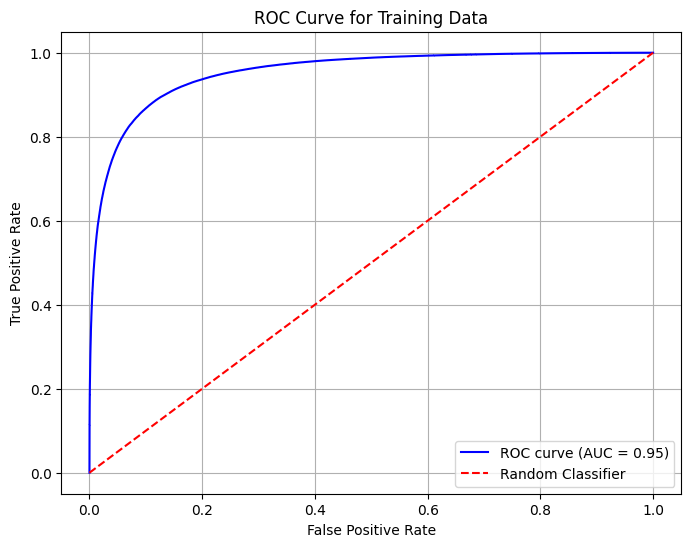


ROC curve plotted with AUC score: 0.9529


In [13]:
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, roc_curve, roc_auc_score
import matplotlib.pyplot as plt

# 1. Make predictions on the training data
y_train_pred = model.predict(X_train)
y_train_pred_proba = model.predict_proba(X_train)[:, 1]

print("Predictions made on training data.")

# 2. Calculate classification metrics for training data
accuracy = accuracy_score(y_train, y_train_pred)
precision = precision_score(y_train, y_train_pred)
recall = recall_score(y_train, y_train_pred)
f1 = f1_score(y_train, y_train_pred)

# 3. Print the calculated metrics for the training data
print("\n--- Training Data Metrics ---")
print(f"Accuracy: {accuracy:.4f}")
print(f"Precision: {precision:.4f}")
print(f"Recall: {recall:.4f}")
print(f"F1-score: {f1:.4f}")

# 4. Calculate ROC curve and AUC score for training data
fpr, tpr, thresholds = roc_curve(y_train, y_train_pred_proba)
auc_score = roc_auc_score(y_train, y_train_pred_proba)

# 5. Plot the ROC curve
plt.figure(figsize=(8, 6))
plt.plot(fpr, tpr, color='blue', label=f'ROC curve (AUC = {auc_score:.2f})')
plt.plot([0, 1], [0, 1], color='red', linestyle='--', label='Random Classifier')
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('ROC Curve for Training Data')
plt.legend()
plt.grid(True)

# 6. Display the plot
plt.show()

print(f"\nROC curve plotted with AUC score: {auc_score:.4f}")


I will create a pandas DataFrame using the `test_ids` for the 'id' column and the `y_pred_proba` for the 'Heart Disease' column, then save it to 'submission.csv' without the index, as specified in the instructions.



In [14]:
import pandas as pd

# Create the submission DataFrame
submission_df = pd.DataFrame({
    'id': test_ids,
    'Heart Disease': y_pred_proba
})

# Save the submission DataFrame to a CSV file
submission_df.to_csv('submission.csv', index=False)

print("Submission file 'submission.csv' created successfully.")
print("First 5 rows of the submission file:")
display(submission_df.head())

Submission file 'submission.csv' created successfully.
First 5 rows of the submission file:


,id,Heart Disease
0,630000,0.897777
1,630001,0.004788
2,630002,0.989521
3,630003,0.005530
4,630004,0.278836



The model's performance was evaluated using several key metrics on the training data:
*   **Accuracy:** The model achieved an accuracy of 0.8855, indicating that it correctly classified approximately 88.55% of the training instances.
*   **Precision:** With a precision of 0.8818, about 88.18% of the cases predicted as 'Presence' of heart disease were actually positive.
*   **Recall:** The model demonstrated a recall of 0.8598, meaning it correctly identified approximately 85.98% of all actual positive cases of heart disease.
*   **F1-score:** The F1-score, which is the harmonic mean of precision and recall, was 0.8707, suggesting a good balance between precision and recall.
*   **ROC Curve and AUC:** The Area Under the Curve (AUC) for the Receiver Operating Characteristic (ROC) curve was 0.9529. An AUC value close to 1 indicates excellent discriminatory power, suggesting the model is highly capable of distinguishing between patients with and without heart disease on the training set.

